# Project: Investigate TMDB Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

#### TMDB dataset contains many movies of different genres. Each movies is associated with its title, budget, revenue, release_year, etc.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Questions
1) **What are the most popular genres for each year?**

2) **What genres achieve highest average revenue?**

3) **What kinds of properties are associated with revenues?**

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [317]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [318]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

### Data Cleaning

In [319]:
# Columns to drop since they aren't used in the Analysis
cols = ['id', 'imdb_id', 'cast', 'homepage', 'tagline', 'director', 'keywords', 'overview','production_companies',
        'release_date', 'budget_adj', 'revenue_adj', 'original_title']
df.drop(cols, axis=1, inplace=True)
df.head()

,popularity,budget,revenue,runtime,genres,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,28.419936,150000000,378436354,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
2,13.112507,110000000,295238201,119,Adventure|Science Fiction|Thriller,2480,6.3,2015
3,11.173104,200000000,2068178225,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015
4,9.335014,190000000,1506249360,137,Action|Crime|Thriller,2947,7.3,2015


In [320]:
# drop rows that have NA genres
df.dropna(inplace=True)

In [321]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10843 entries, 0 to 10865
Data columns (total 8 columns):
popularity      10843 non-null float64
budget          10843 non-null int64
revenue         10843 non-null int64
runtime         10843 non-null int64
genres          10843 non-null object
vote_count      10843 non-null int64
vote_average    10843 non-null float64
release_year    10843 non-null int64
dtypes: float64(2), int64(5), object(1)
memory usage: 762.4+ KB


In [322]:
# Drop duolicated rows
print(sum(df.duplicated()))
df.drop_duplicates(inplace=True)
print(sum(df.duplicated()))

1
0


In [323]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 8 columns):
popularity      10842 non-null float64
budget          10842 non-null int64
revenue         10842 non-null int64
runtime         10842 non-null int64
genres          10842 non-null object
vote_count      10842 non-null int64
vote_average    10842 non-null float64
release_year    10842 non-null int64
dtypes: float64(2), int64(5), object(1)
memory usage: 762.3+ KB


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (What are the most popular genres for each year)

In [324]:
# Extract all available genres
genres = {}
def fun(genre):
    for gen in genre.split('|'):
        genres[gen] = 1
        
df.genres.apply(fun)
genres = np.array(sorted(genres.keys()))
print(genres)

['Action' 'Adventure' 'Animation' 'Comedy' 'Crime' 'Documentary' 'Drama'
 'Family' 'Fantasy' 'Foreign' 'History' 'Horror' 'Music' 'Mystery'
 'Romance' 'Science Fiction' 'TV Movie' 'Thriller' 'War' 'Western']


> **Note** There are 20 genres in the Dataset

In [325]:
# Extract all available years
years = np.array(sorted(df.release_year.unique()))
print(years)
print(years.shape)

[1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973
 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987
 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001
 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015]
(56,)


> **Note** There are 56 Years in the Dataset (1960-2015)

In [326]:
# Mean popularity for each Genres in each year and mean revenue
popularity_df = pd.DataFrame(index=genres, columns=['revenue']+list(years))

for genre in genres:
    popularity_df.loc[genre, 'revenue'] = df.query('genres.str.contains(@genre)').revenue.mean() 
    for year in years:
        popularity_df.loc[genre, year] = df.query('release_year==@year and genres.str.contains(@genre)').popularity.mean()
popularity_df

,revenue,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Action,7.27947e+07,0.590724,0.365913,0.708945,0.951729,0.813087,0.451373,0.263347,0.72357,0.365562,...,0.75324,0.76057,0.894801,0.868464,0.935669,1.0581,1.13118,1.009,1.68201,2.25142
Adventure,1.13138e+08,0.700981,0.767323,0.942513,0.728487,0.736431,0.581821,0.293593,1.02555,1.10915,...,0.942364,0.853849,1.00838,1.13842,1.36032,1.12949,1.46148,1.26083,2.43053,3.28379
Animation,7.52561e+07,NaN,2.63199,NaN,2.18041,0.445746,0.600975,0.585717,1.3488,0.302135,...,0.798133,0.702605,0.860545,0.828221,0.69492,0.964938,0.805354,0.864769,1.12401,1.1463
Comedy,3.75262e+07,0.396,0.679838,0.273183,0.444481,0.491229,0.358721,0.323658,0.434822,0.329548,...,0.627083,0.525933,0.513957,0.560836,0.586035,0.670374,0.592222,0.603933,0.866663,0.938527
Crime,4.23687e+07,0.34648,0.806519,0.472816,0.552367,0.26169,0.387277,0.340702,0.538359,0.555919,...,0.669021,0.682438,0.769495,0.540392,0.693938,0.891704,0.863569,0.915736,0.883996,1.72203
Documentary,2.04111e+06,NaN,NaN,NaN,NaN,NaN,NaN,0.080598,0.095101,NaN,...,0.20641,0.224261,0.170135,0.20891,0.225092,0.188776,0.154906,0.166475,0.151321,0.190483
Drama,2.92323e+07,0.566305,0.432233,0.392,0.322448,0.364818,0.305288,0.339766,0.511467,0.377322,...,0.555578,0.558097,0.531565,0.566505,0.58628,0.598544,0.605073,0.660076,0.867474,0.937877
Family,7.24332e+07,0.278064,0.755722,0.323463,0.852632,0.878298,0.662713,0.398896,0.962015,0.426263,...,0.7755,0.867187,0.789651,0.822501,0.967878,0.776302,0.744235,0.823464,1.11083,1.36904
Fantasy,9.63137e+07,0.428247,0.154073,0.235542,0.214071,0.599791,NaN,0.424771,0.187009,0.445584,...,1.02313,0.957349,0.876319,1.03282,1.06737,1.01163,1.35783,1.01905,1.82935,1.74023
Foreign,1.52046e+06,0.194948,0.113651,0.235542,0.351647,0.152209,0.00477,0.361556,NaN,NaN,...,0.237193,0.227935,0.21003,0.221696,0.197701,0.129987,0.0995893,NaN,NaN,NaN


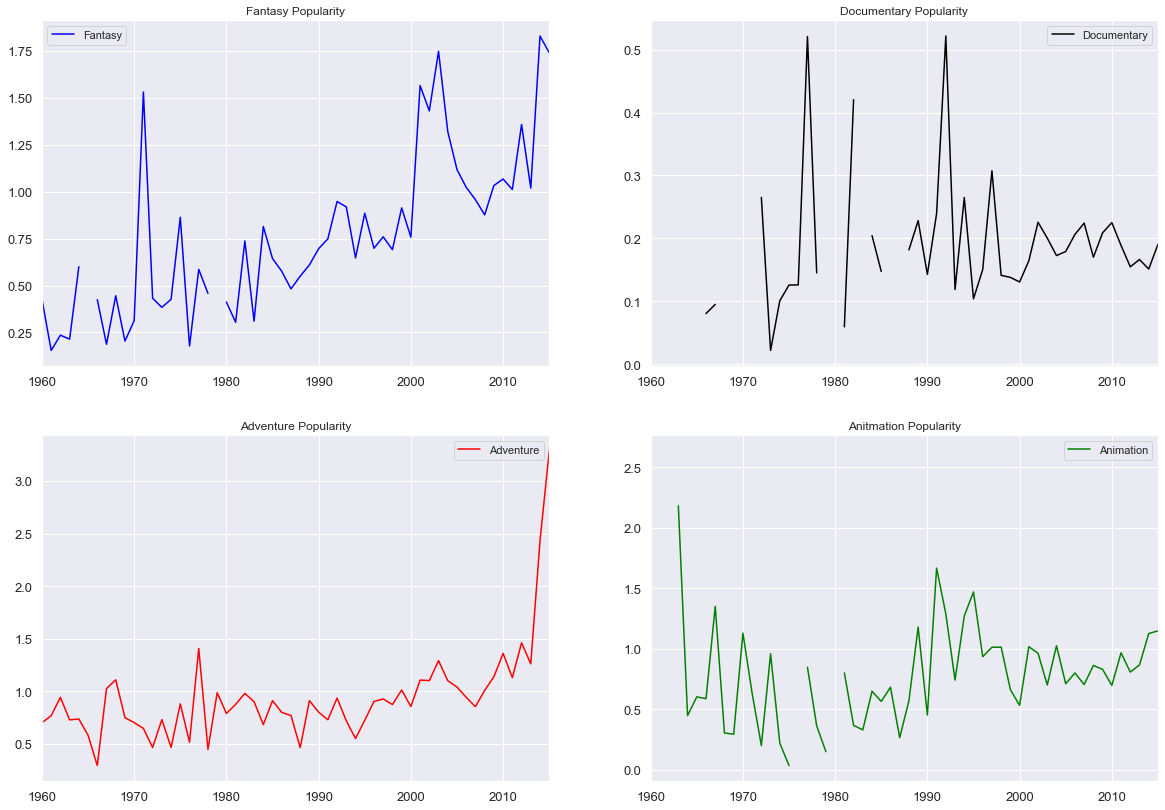

In [367]:
# Draw the popularity of Fantasy, Documentary, Adventure and Animation over years
fig, ax = plt.subplots(2,2, figsize = (20,14))
popularity_df.loc['Fantasy'][1:].plot(label="Fantasy",color = 'blue',ax=ax[0][0], legend=True, title='Fantasy Popularity', fontsize=13);
popularity_df.loc['Documentary'][1:].plot(label="Documentary",color = 'black',ax=ax[0][1], legend=True, title='Documentary Popularity', fontsize=13);
popularity_df.loc['Adventure'][1:].plot(label="Adventure",color = 'red',ax=ax[1][0], legend=True, title='Adventure Popularity', fontsize=13);
popularity_df.loc['Animation'][1:].plot(label="Animation",color = 'green',ax=ax[1][1], legend=True, title='Anitmation Popularity', fontsize=13);

> **Note** Adventure and Fantasy getting popular, while Animation and Documentary are getting less popular

### Research Question 2  (What genres achieve highest average revenue?)

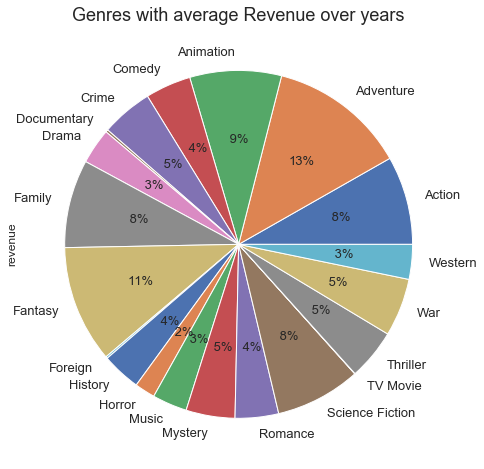

In [352]:
# Draw the genre with mean revenue
popularity_df['revenue'].plot(kind='pie', figsize=(16,8), fontsize=13, autopct=lambda x:'{:2.0f}%'.format(x) if x > 1 else '')
plt.title('Genres with average Revenue over years', fontsize=18);

> **Note** Adventure achieves the highest revenue

### Research Question 3  (What kinds of properties are associated with revenues?)

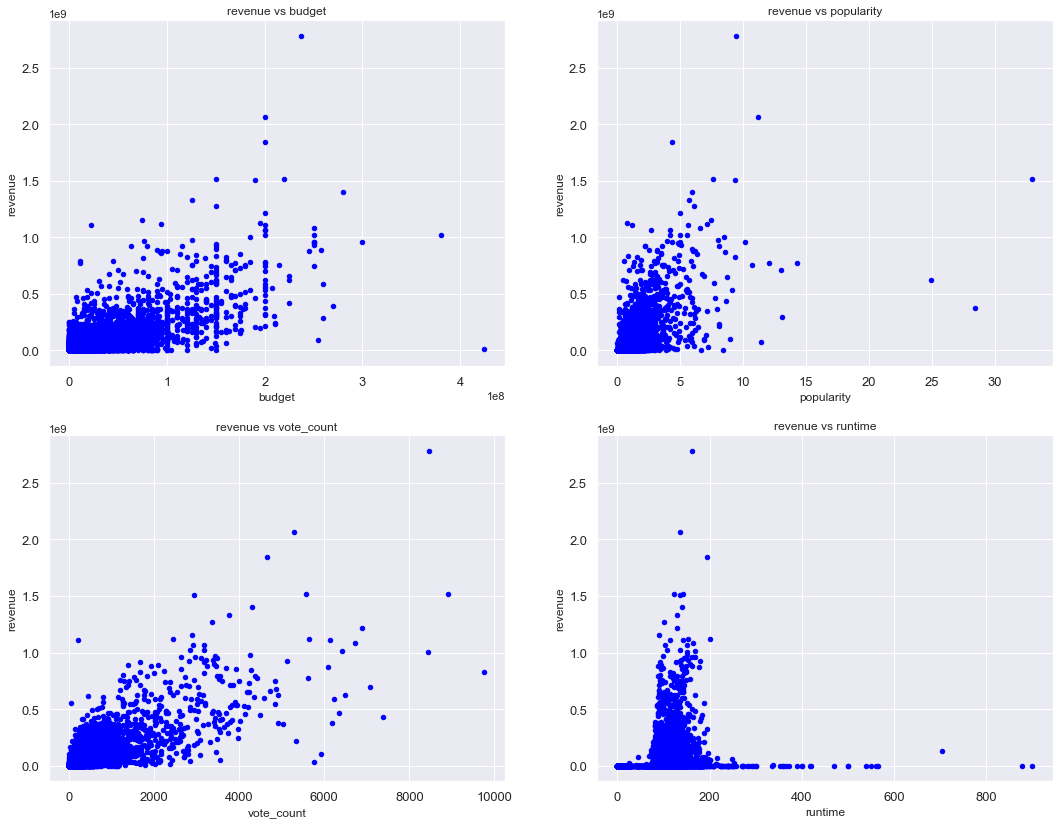

In [359]:
fig, ax = plt.subplots(2,2, figsize = (18,14));
df.plot(x='budget', y='revenue', kind='scatter', c='blue', ax=ax[0][0], title='revenue vs budget', fontsize=13)
df.plot(x='popularity', y='revenue', kind='scatter', c='blue',ax=ax[0][1], title='revenue vs popularity', fontsize=13)
df.plot(x='vote_count', y='revenue', kind='scatter', c='blue',ax=ax[1][0], title='revenue vs vote_count', fontsize=13)
df.plot(x='runtime', y='revenue', kind='scatter', c='blue',ax=ax[1][1], title='revenue vs runtime', fontsize=13);

> **Note** Revenue has positive correlation with budget, popularity and vote_count

<a id='conclusions'></a>
## Conclusions

### Summary
* Adventure and Fantasy movies became very popular in the recent years.
* Documentary and Animation movies were popular in 1960s and 1970s. However, they became much less popular in the recent years.
* Adventure movies achieve highest revenue on average followed by Fantasy movies.
* Revenue has kind of positive correlation with budget, popularity and vote_count

### Limitations
* Dropped the rows that had NA genres since they represented a very small portion of the data so I wouldn't lose much data. However, these NA values could be replaced with the popular genres in these years.
* In some graphs, there are some discontinuties in years because some genres were absent in these years.